In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# Graphs for basic visualization
nofStocks = len(os.listdir("Stocks"))

In [94]:
dataset = pd.read_csv('dataSet_differences.csv')

print(dataset.shape)

print(dataset.head(5))

(499, 1594)
   Month   Day    Year       AAL        ACB       AMD        BA        GD  \
0    1.0  10.0  2018.0  4.908886  -8.364662  1.505017  2.454251  0.371182   
1    1.0  11.0  2018.0  3.633469 -14.871795 -0.988468  2.465560  2.471900   
2    1.0  12.0  2018.0 -0.838038  15.903614 -0.915141 -0.312301 -2.022885   
3    1.0  16.0  2018.0  0.310452   3.118503  2.267003  4.729086  1.061407   
4    1.0  17.0  2018.0  0.309491   5.524194  2.380952 -3.091082 -0.345291   

       GOOG       LMT  ...  1567  1568  1569  1570  1571  1572  1573  1574  \
0  0.263922  0.024171  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  1.514219  1.546219  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2 -0.044553 -1.826027  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.911066  1.438914  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4 -0.193461 -0.555452  ...   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   

   1575  1576  
0   0.0   0.0  
1   0.0   0.0  
2   0.0 

In [95]:
tweetsWithDifferences = dataset.iloc[:, range(0, 3 + nofStocks)]
print(len(os.listdir("Stocks")))
print(tweetsWithDifferences.head(5))

14
   Month   Day    Year       AAL        ACB       AMD        BA        GD  \
0    1.0  10.0  2018.0  4.908886  -8.364662  1.505017  2.454251  0.371182   
1    1.0  11.0  2018.0  3.633469 -14.871795 -0.988468  2.465560  2.471900   
2    1.0  12.0  2018.0 -0.838038  15.903614 -0.915141 -0.312301 -2.022885   
3    1.0  16.0  2018.0  0.310452   3.118503  2.267003  4.729086  1.061407   
4    1.0  17.0  2018.0  0.309491   5.524194  2.380952 -3.091082 -0.345291   

       GOOG       LMT        MU       NOC       NRT       RTN       USO  \
0  0.263922  0.024171 -1.131381  0.630670  2.771363 -0.067185  0.157729   
1  1.514219  1.546219 -0.023351  1.809080  1.460674  2.125679  1.338583   
2 -0.044553 -1.826027  0.256942 -0.828172 -1.328904 -0.876132 -0.854701   
3  0.911066  1.438914  3.122088  1.590197  0.000000  0.643749  0.156740   
4 -0.193461 -0.555452 -0.610023 -1.010999 -0.448934 -0.649778 -0.156495   

         ZN     ^GSPC  
0  1.327434  0.703365  
1  0.436681  0.674960  
2 -4.347826

In [96]:
tweetAverageEffects = pd.DataFrame(data=None, columns = tweetsWithDifferences.columns[3:3+nofStocks])

means = []
extremums = []
names = []
stds = []

for i in range(3, tweetsWithDifferences.shape[1]):
    stock = tweetsWithDifferences.iloc[:,i]
    extremums.append(stock.mad())
    means.append(stock.mean())
    names.append(stock.name)
    stds.append(stock.std())

basicStockData = pd.DataFrame(columns = names, data = [extremums, means, stds], index = ['mad change', 'mean change', 'std'])
print(basicStockData.head(5))



AAL       ACB       AMD        BA        GD      GOOG  \
mad change   1.770520  3.751318  2.574371  1.416313  1.017944  1.159906   
mean change -0.097699 -0.212798  0.331197  0.011807 -0.011217  0.067515   
std          2.388311  5.191083  3.675907  1.886500  1.368708  1.656446   

                  LMT        MU       NOC       NRT       RTN       USO  \
mad change   0.943090  2.217042  1.144226  1.604735  1.036656  1.397927   
mean change  0.050560  0.087662  0.050339 -0.054588  0.043551  0.012136   
std          1.315257  2.946120  1.584818  2.158703  1.416165  1.929868   

                    ZN     ^GSPC  
mad change    4.856304  0.654850  
mean change  -0.000211  0.041329  
std          10.079760  0.944090  


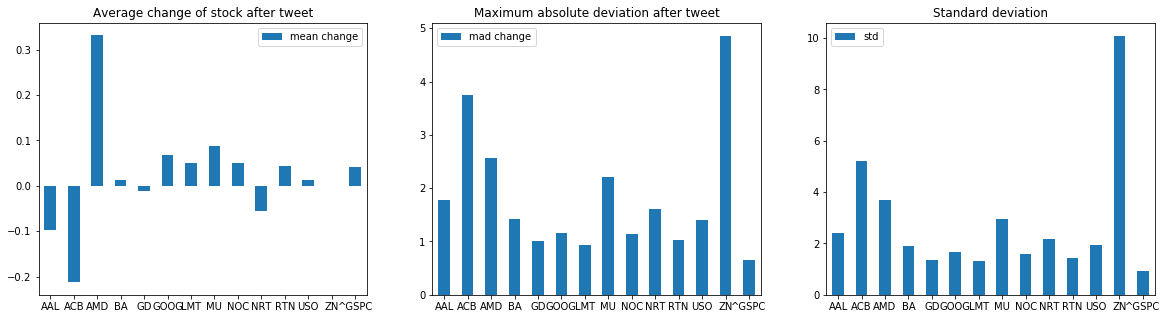

In [97]:
fig, axs = plt.subplots(1,3, figsize=(20,5))

basicStockData.transpose().plot.bar(ax = axs[0], y = 'mean change', rot = 0, title = "Average change of stock after tweet")
basicStockData.transpose().plot.bar(ax = axs[1], y = 'mad change', rot = 0, title = "Maximum absolute deviation after tweet")
basicStockData.transpose().plot.bar(ax = axs[2], y = 'std', rot = 0, title = "Standard deviation")

